# Comparison of Low-Resolution Cicle3 arxiv

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of Histograms](#2-comparison-of-histograms)

4. [Tropical Mean Comparison](#3-mean-comparison)

5. [The bias between models and observations](#4-calculation-of-a-bias-between-climatological-model-and-observations)

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [8]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

##### Loading the low-resolution arxiv 

#### ICON, ngc3028, lra

In [2]:
reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
icon_ngc3028    = reader.retrieve()

#### IFS, tco2559-ng5, lra

In [10]:
reader              = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly") 
ifs_tco2559_ng5     = reader.retrieve()

#### IFS, tco1279-orca025-cycle3, lra

In [4]:
reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
ifs_tco1279_orca025     = reader.retrieve()

#### MSWEP, monthly 

In [5]:
reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep_mon               = reader.retrieve(regrid=True)

### Initialization of the tropical-rainfall diagnostic

The class attributes are:
- The latitude band of the tropical area: **trop_lat=15**     
    
- The number of bins in the histogram: **num_of_bins=20**
    
- The left edge of the first bin: **first_edge = 0** 
    
- The width of each bin: **width_of_bin**     
    

In [3]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)

## 2. Comparison of histograms

##### All output of the diagnostic is in the format of NetCDF or PDF. The paths to the repositories, where the diagnostic store the output, are 

In [6]:
path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/"
path_to_pdf    = "/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/"

#### The function `histogram` calculates and stores the histograms in a specified repository. 

In [ ]:
hist_icon_ngc3028 = diag.histogram(icon_ngc3028, path_to_histogram=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly")

In [9]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-09 17:56:37 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [10]:
hist_ifs_tco1279_orca025 = diag.histogram(ifs_tco1279_orca025, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-09 17:56:38 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [11]:
hist_mswep_mon = diag.histogram(mswep_mon, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_monthly_r100")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-09 17:56:56 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


##### The diagnostic can provide us with a graphical comparison of the obtained histograms.  
##### Below we compare the precipitation pdf with the units `mm/day`. Units of precipitation: mm  day**-1

2023-07-09 17:57:07 :: create_folder :: WARNING  -> Folder ./ already exists


{<Axes: title={'center': 'Monthly, 1 degree res (100km)'}, xlabel='Precipitation, [mm/day]', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

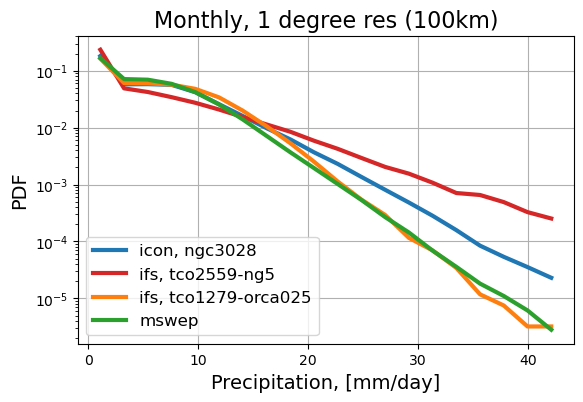

In [13]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=0.8, 
                new_unit="mm/day",
                legend='icon, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="mm/day",
                legend='ifs, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="mm/day",
                legend='ifs, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="mm/day",
                legend='mswep',
                plot_title='Monthly, 1 degree res (100km)', loc='lower left', 
                pdf_format =pdf_format,
                path_to_pdf=path_to_pdf, 
                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison')

## 3. Mean comparison

##### The diagnostic can also give us a graphical comparison of the mean value along different coordinates. 

For example, the function `mean_and_median_plot()` calculates the mean value of precipitation during 
 - December-January-February (`DJF`), 
 - March-April-May (`MAM`), 
 - June-July-August (`JJA`), 
 - September-October-November (`SON`), and 
- for the total period of time. 

Then the function  `mean_and_median_plot(coord='lon')` calculates the mean value of precipitation along the longitude. 

In the end, the mean values of precipitation for each value of latitude in millimeters per day are:

2023-07-09 17:59:30 :: create_folder :: WARNING  -> Folder ./ already exists


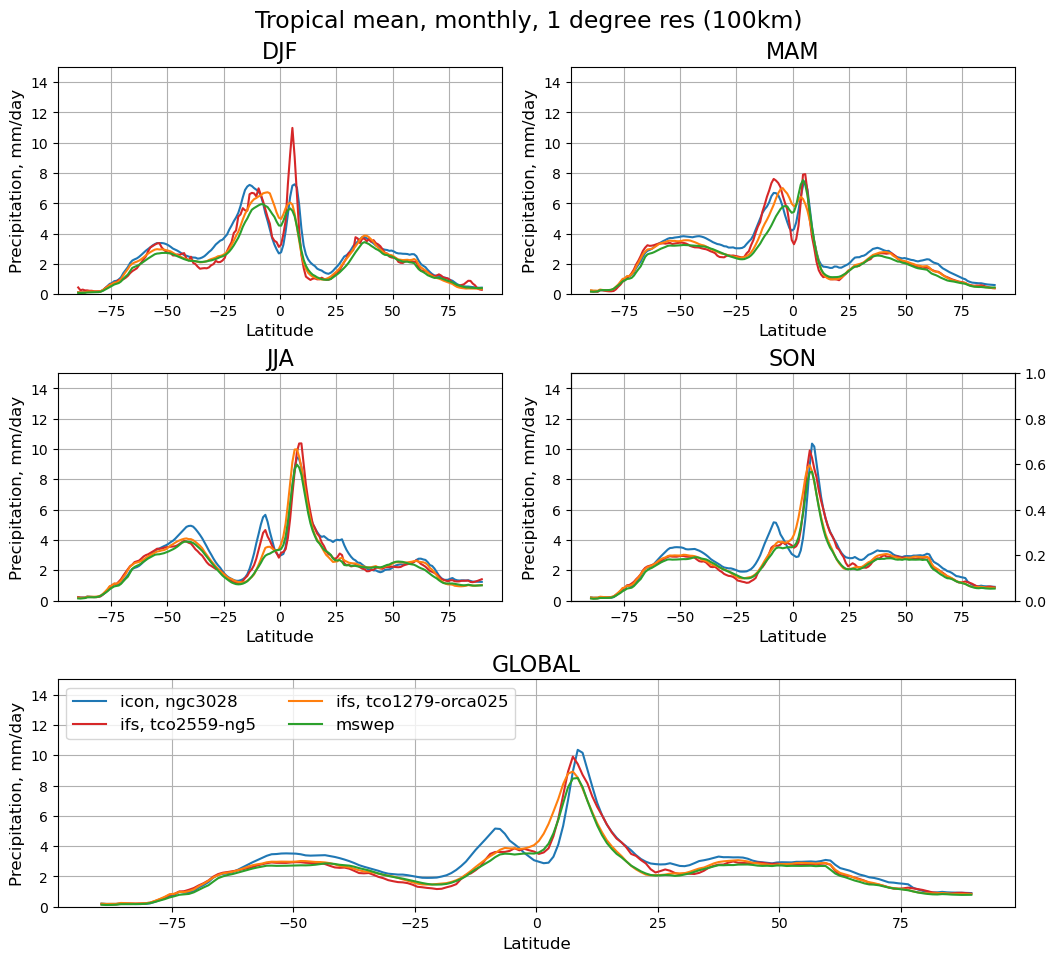

In [16]:
coord = 'lon'
diag.trop_lat=90
add = diag.mean_and_median_plot(icon_ngc3028,                   coord=coord,  
                                legend='icon, ngc3028',         color='tab:blue', figsize=0.95,      new_unit = 'mm/day' )

add = diag.mean_and_median_plot(ifs_tco2559_ng5,    fig=add,    coord=coord,  
                                legend='ifs, tco2559-ng5',      color='tab:red',                    new_unit = 'mm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,fig=add,    coord=coord,  
                                legend='ifs, tco1279-orca025', color='tab:orange',                  new_unit = 'mm/day')

add = diag.mean_and_median_plot(mswep_mon,          fig=add,    coord=coord,  
                                legend='mswep',                 color='tab:green',                  new_unit = 'mm/day',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper left',
                                path_to_pdf=path_to_pdf, 
                                pdf_format =pdf_format,
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lat')

The function `mean_and_median_plot(coord='lat')` calculates the mean precipitation value for each season (`DJF`, `MAM`, `JJA`, `SON` and for all period of time) and along the tropical area. 

The mean values of tropical precipitation for each value of longitude in millimeters per day are:

2023-07-08 18:43:01 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


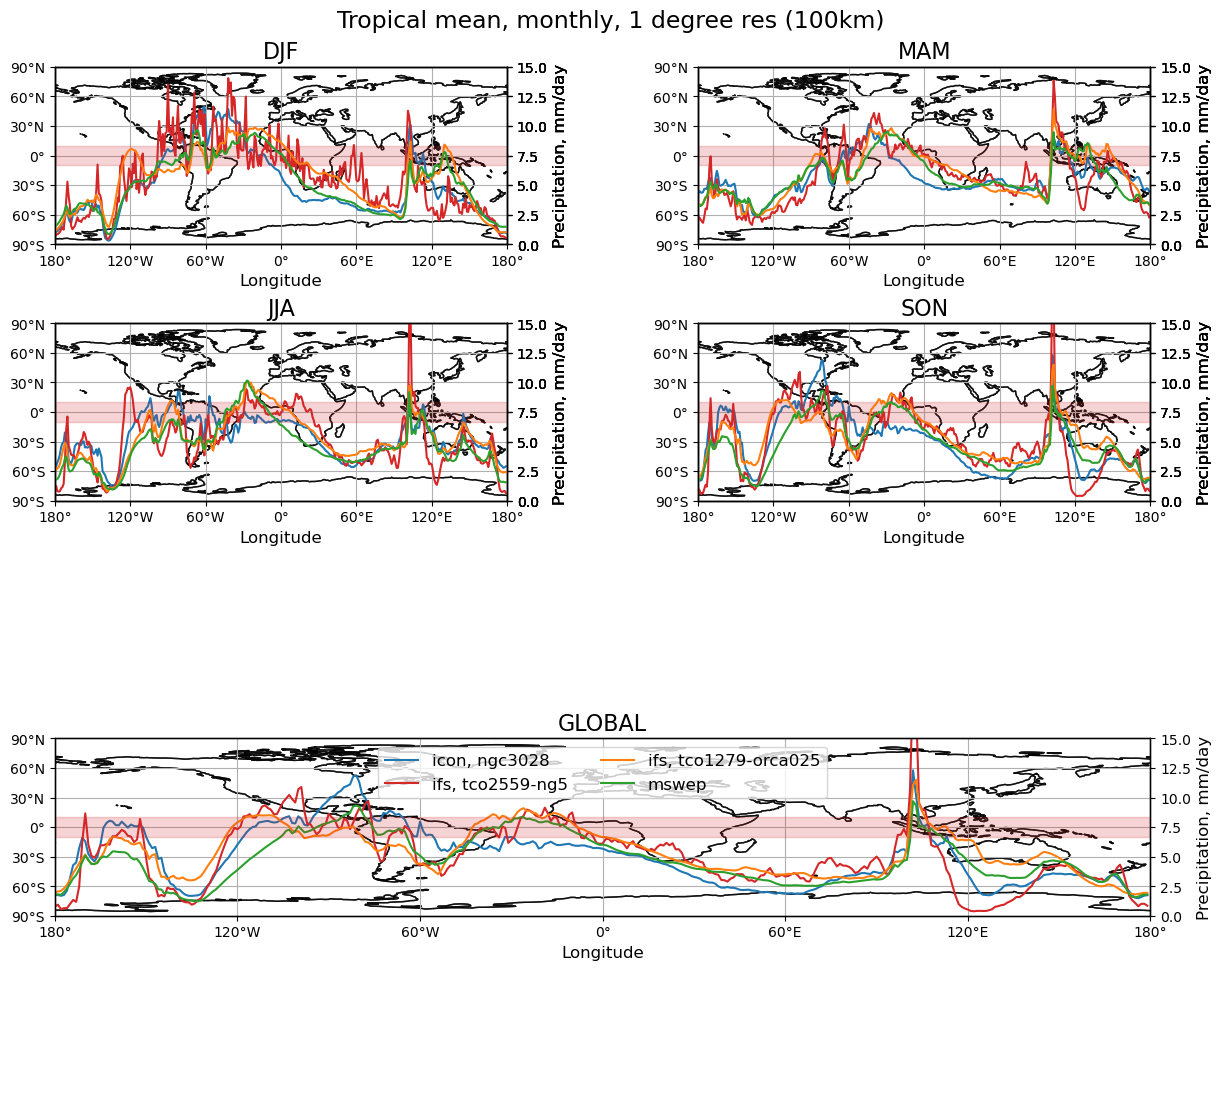

In [9]:
coord = 'lat'
diag.trop_lat=10
add = diag.mean_and_median_plot(icon_ngc3028,                   coord=coord,  
                                legend='icon, ngc3028',         color='tab:blue', figsize=1.1,      new_unit = 'mm/day' )

add = diag.mean_and_median_plot(ifs_tco2559_ng5,    fig=add,    coord=coord,  
                                legend='ifs, tco2559-ng5',      color='tab:red',                    new_unit = 'mm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,fig=add,    coord=coord,  
                                legend='ifs, tco1279-orca025', color='tab:orange',                  new_unit = 'mm/day')

add = diag.mean_and_median_plot(mswep_mon,          fig=add,    coord=coord,  
                                legend='mswep',                 color='tab:green',                  new_unit = 'mm/day',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper center',
                                path_to_pdf=path_to_pdf, 
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lon')

## 4. Calculation of a bias between climatological model and observations

Tropical-rainfall diagnostic provides the graphical representation of the bias between the mean value of precipitation of the climatological model and the mean value of observations. 

The mean value the function calculates for each season (`DJF`, `MAM`, `JJA`, `SON`) and for the total period of time. 

2023-07-09 18:05:07 :: create_folder :: WARNING  -> Folder ./ already exists


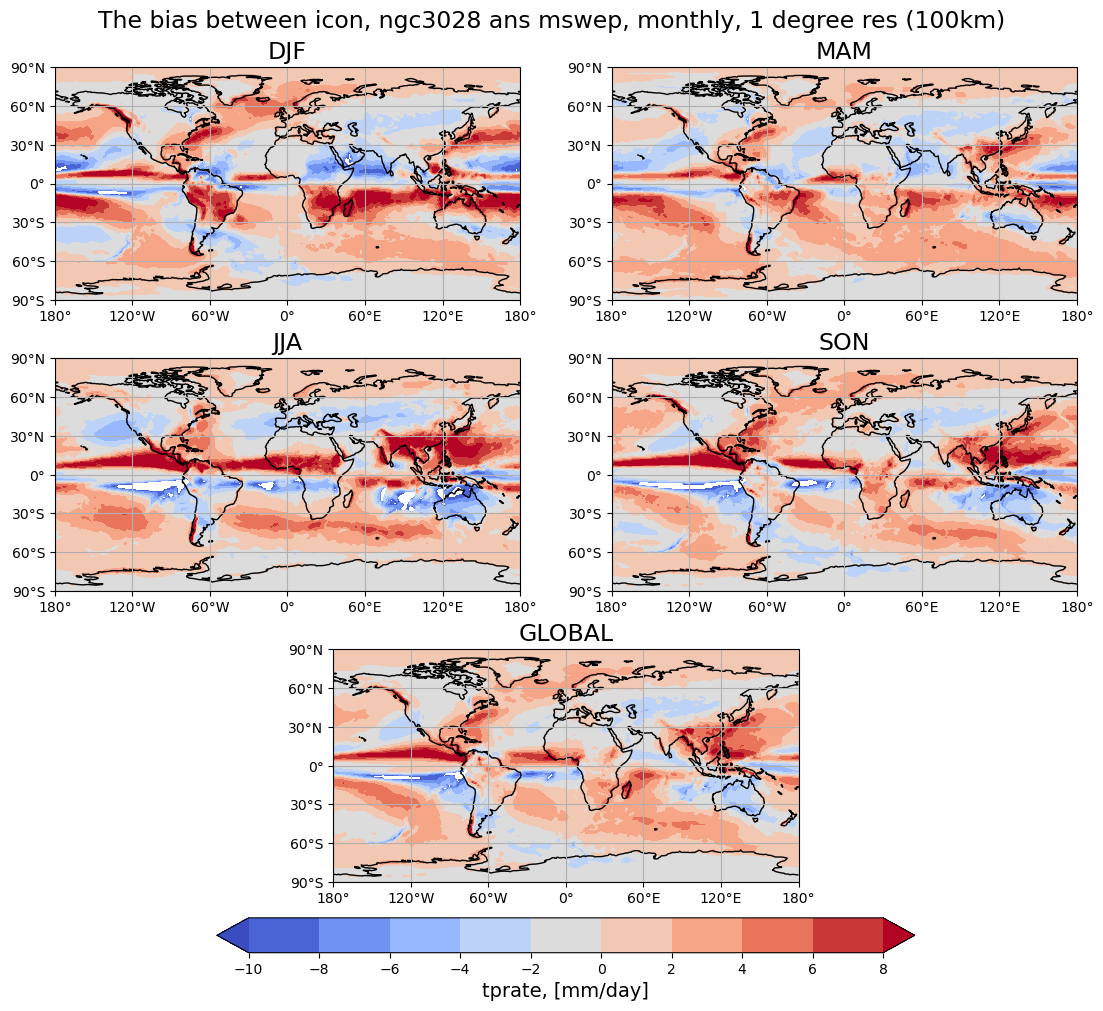

In [8]:
diag.plot_bias(icon_ngc3028, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-10, vmax=10,
                    plot_title='The bias between icon, ngc3028 ans mswep, monthly, 1 degree res (100km)',
                    pdf_format = pdf_format, 
                    path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_mswep_lra_r100_monthly_bias')

2023-07-08 15:46:56 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


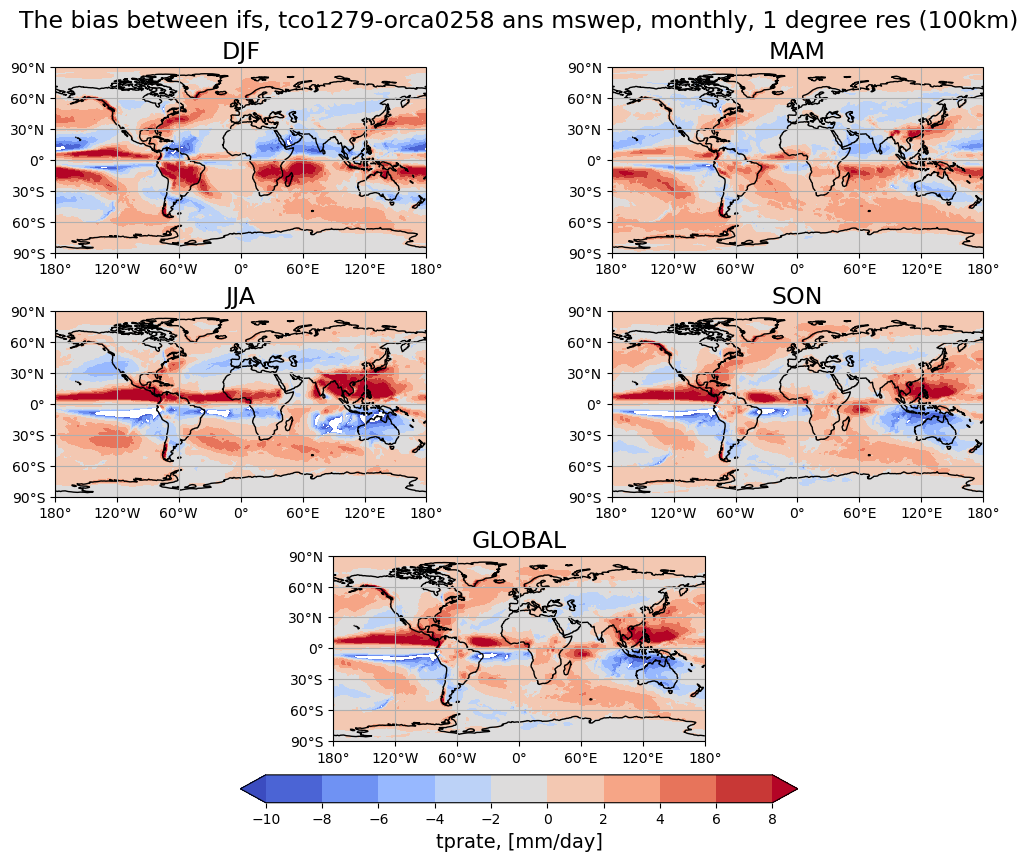

In [13]:
diag.plot_bias(ifs_tco1279_orca025, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-10, vmax=10,
                    plot_title='The bias between ifs, tco1279-orca0258 ans mswep, monthly, 1 degree res (100km)',
                    path_to_pdf=path_to_pdf, name_of_file='ifs_tco1279_orca0258_mswep_lra_r100_monthly_bias')

2023-07-08 15:48:09 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


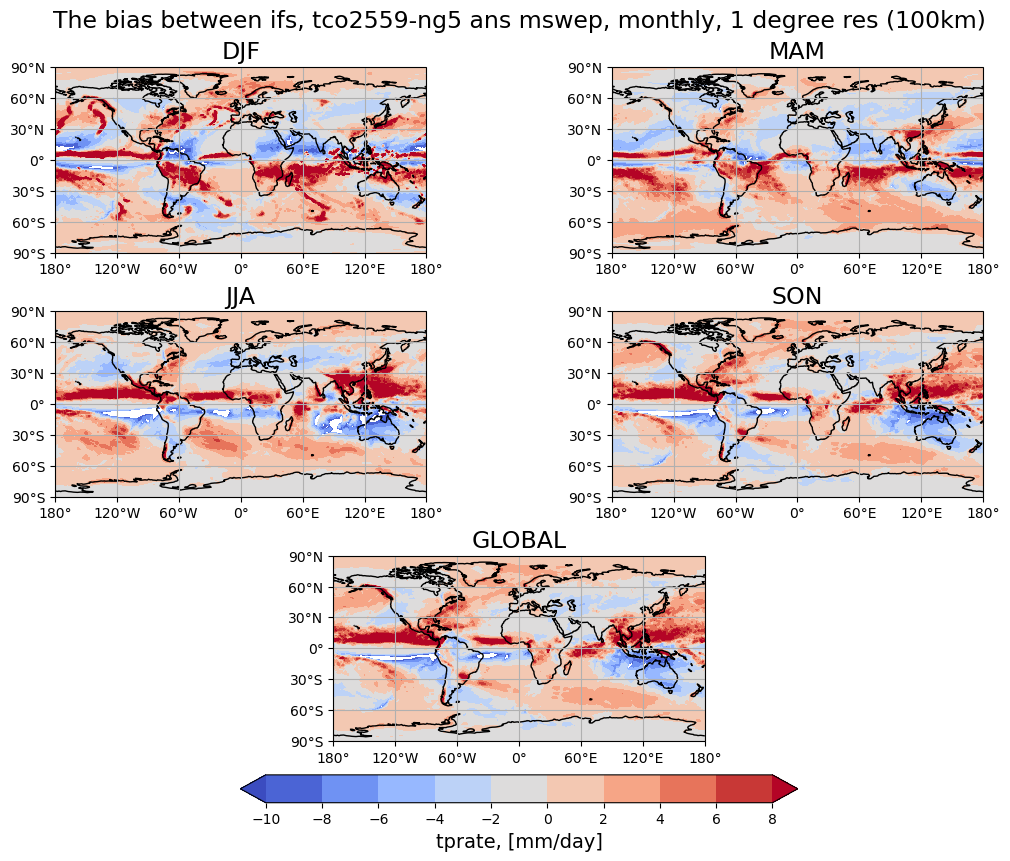

In [14]:
diag.plot_bias(ifs_tco2559_ng5, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-10, vmax=10,
                    plot_title='The bias between ifs, tco2559-ng5 ans mswep, monthly, 1 degree res (100km)',
                    path_to_pdf=path_to_pdf, name_of_file='tco2559-ng5_mswep_lra_r100_monthly_bias')

#

##### The end